In [127]:
import cv2 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
plt.rcParams['image.cmap'] = 'gray'

In [2]:
#read image
im = 255-cv2.imread(v)[:,:,2]
print(im.shape)
plt.imshow(im)
plt.show()
#set up the detector 
detector = cv2.SimpleBlobDetector_create()




NameError: name 'v' is not defined

In [53]:
#set blobs
keypoints = detector.detect(im)
print(keypoints)

#draw detected blobs
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#show keypoints
cv2.imshow("Keypoints", im_with_keypoints)

cv2.waitKey(0)
cv2.destroyAllWindows()

[<KeyPoint 0000028C2DD12BA0>, <KeyPoint 0000028C2DD12A50>, <KeyPoint 0000028C2DD12690>, <KeyPoint 0000028C2DD12270>, <KeyPoint 0000028C2DD129C0>]


In [52]:
print(keypoints[0].pt)
print(keypoints[0].size)
print(keypoints[0].angle)

(134.77438354492188, 31.08979034423828)
6.407632350921631
-1.0


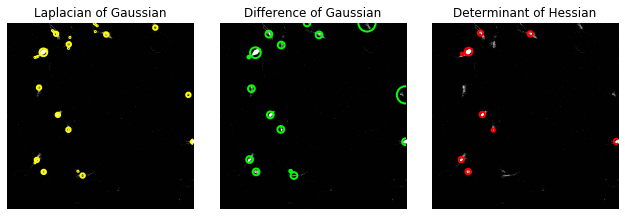

In [22]:
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

image = cv2.imread("Muestras/9.tif")[:,:,2]
#image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

Medir los dos ejes:

In [128]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
 
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
    help="path to the input image")
ap.add_argument("-w", "--width", type=float, required=True,
    help="width of the left-most object in the image (in inches)")

#args = vars(ap.parse_args())
args = "Muestras/9.tif" , 10

In [161]:
# load the image, convert it to grayscale, and blur it slightly
#image = cv2.imread(args["Muestras/9.tif"])
#image = cv2.imread("Muestras/9.tif")
image = cv2.imreadmulti("Muestras/9.tif")[1][0]
width =1
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (7, 7), 0)
gray = cv2.GaussianBlur(image, (7, 7), 0)
 
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 0, 20)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
 
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
 
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

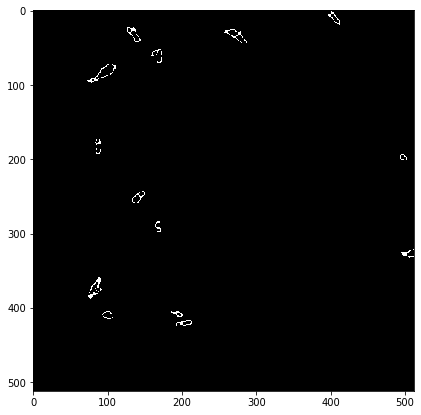

In [162]:
plt.imshow(edged)
plt.show()

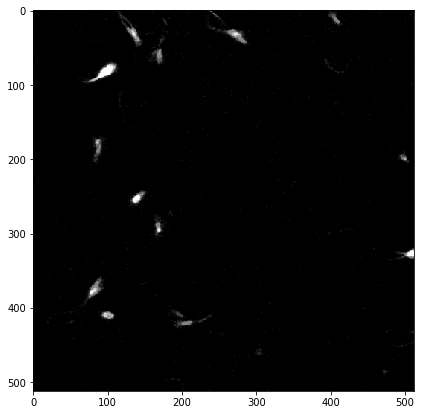

254.99999999999997


In [163]:
orig = image.copy()
plt.imshow(orig*(255/29))
plt.show()
print(np.max(orig*(255/29)))

In [164]:
# loop over the contours individually
dims = []
for c in cnts:
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 5:
        continue
    # compute the rotated bounding box of the contour
    orig = image.copy()*7
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
 
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
 
    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
        # unpack the ordered bounding box, then compute the midpoint
    # between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
 
    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
 
    # draw the midpoints on the image
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
 
    # draw lines between the midpoints
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
        (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
        (255, 0, 255), 2)
    # compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
 
    # if the pixels per metric has not been initialized, then
    # compute it as the ratio of pixels to supplied metric
    # (in this case, inches)
    if pixelsPerMetric is None:
        #pixelsPerMetric = dB / args["width"]
        pixelsPerMetric = dB / width
    # compute the size of the object
    dimA = dA #/ pixelsPerMetric
    dimB = dB #/ pixelsPerMetric
 
    # draw the object sizes on the image
    cv2.putText(orig, "{:.1f}pixels".format(dimA),
        (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}pixels".format(dimB),
        (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (255, 255, 255), 2)
 
    #Save dims if objects
    dims.append(max(dA,dB))
    dims.append(min(dA,dB))
    # show the output image
    cv2.imshow("Image", orig)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [118]:
print(dims)
d = np.zeros((len(dims)//2,2))
d[:,0] = dims[::2]
d[:,1] = dims[1::2]
print(d)

[43.266615305567875, 13.892443989449804, 21.095023109728988, 8.06225774829855, 24.82438317461282, 11.10180165558726, 20.506096654409877, 9.192388155425117, 32.7566787083184, 13.038404810405298]
[[43.26661531 13.89244399]
 [21.09502311  8.06225775]
 [24.82438317 11.10180166]
 [20.50609665  9.19238816]
 [32.75667871 13.03840481]]


In [121]:
mean_len = np.mean(d[:,0])
mean_width = np.mean(d[:,1])
print('mean_len:',mean_len)
print('mean_width:',mean_width)
std_len = np.std(d[:,0])
std_width = np.std(d[:,1])
print('std_len:',std_len)
print('std_width:',std_width)

mean_len: 28.489759390527592
mean_width: 11.057459271833205
std_len: 8.5839157655376
std_width: 2.2096593519703154


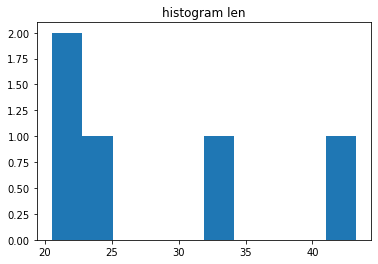

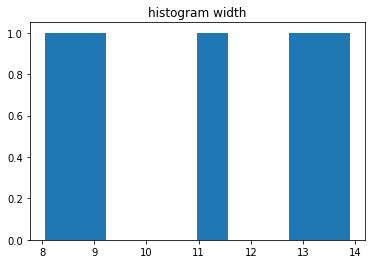

In [122]:
plt.hist(d[:,0]) 
plt.title("histogram len") 
plt.show()

plt.hist(d[:,1]) 
plt.title("histogram width") 
plt.show()

In [ ]:
plt.imshow("Muestras/9.tif")
plt.show()